In [97]:
# Data preperation
# Generate from 2D Random Variable Distribution

import numpy as np
import matplotlib.pyplot as plt

In [98]:
mean_01 = np.array([10, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.2, 0.1], [0.1, 1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 5000)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 5000)

print(dist_01.shape, dist_02.shape)

(5000, 2) (5000, 2)


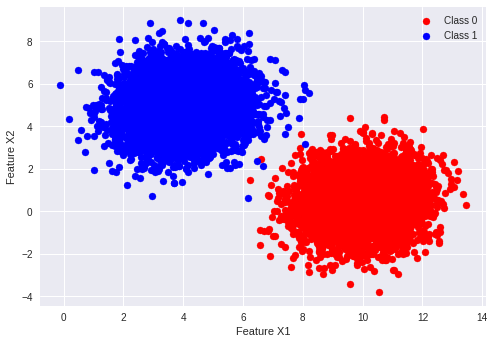

In [99]:
plt.style.use("seaborn")
plt.scatter(dist_01[:,0], dist_01[:,1], color="red", label="Class 0")
plt.scatter(dist_02[:,0], dist_02[:,1], color="blue", label="Class 1")
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.legend()
plt.show()

In [100]:
data = np.zeros((10000, 3))

data[:5000, :2] = dist_01
data[5000:, :2] = dist_02

# Labels
data[5000:, -1] = 1

In [101]:
# Randomly shuffle data
np.random.shuffle(data)

In [102]:
# Divide the data into train and test
split = int(0.8*data.shape[0])

X_train = data[:split, :-1]
X_test = data[split:, :-1]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(8000, 2) (8000,) (2000, 2) (2000,)


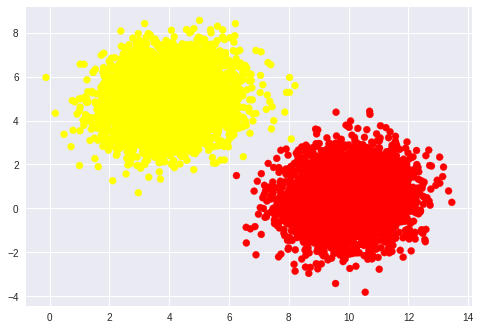

In [103]:
# Plotting and normalization

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.autumn)
plt.show()

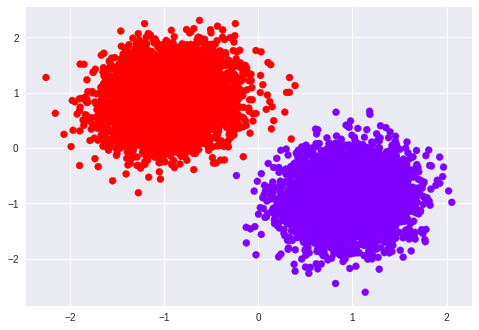

In [104]:
# Normalization

x_mean = X_train.mean(axis=0) # Calculate mean along rows
x_std = X_train.std(axis=0)

# Apply the Transformation
X_test = (X_test-x_mean) / x_std

X_train = (X_train-x_mean) / x_std

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.rainbow)
plt.show()

In [105]:
# LR Implementation

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X, theta):
    """
    X = entire array (m, n+1)
    theta = np.array(n+1, 1)
    """
    return sigmoid(np.dot(X, theta))

def error(X, y, theta):
    """
    X = (m, n+1)
    y = (m, 1)
    theta = (n+1, 1)
    
    return
        scaler_value = loss
    """
    hi = hypothesis(X, theta)
    e = -1*np.mean((y*np.log(hi) + (1-y)*np.log(1-hi)))
    
    return e
    

In [106]:
def gradient(X, y, theta):
    """
    X = (m, n+1)
    y = (m, 1)
    theta = (n+1, 1)
    
    grad = Σ(y^i - hypothesis(x^i))x_j
    
    return
         gradient_vector = (n+1, 1)
    """
    hi = hypothesis(X, theta)
    grad = -np.dot(X.T, (y-hi))
    m = X.shape[0]
    return grad/m

def gradient_descent(X, y, lr = 0.5, max_itr = 500):
    """
    Θj = Θj + ηΣ(yi - h(xi))xj
    """
    
    error_list = []
    theta = np.zeros((X.shape[1], 1))
    for i in range(max_itr):
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
    
        theta = theta - lr*grad
    
    return (theta, error_list)
    
    
        
    

In [107]:
ones = np.ones((X_train.shape[0], 1))
X_new_train = np.hstack((ones, X_train))
# print(X_new_train.shape)
# print(X_new_train)

Y_train = Y_train.reshape((-1, 1))

In [108]:
theta, error_list = gradient_descent(X_new_train, Y_train)

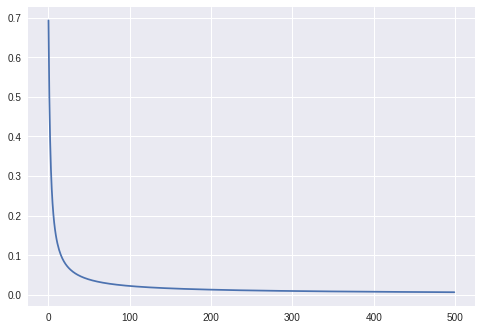

In [109]:
plt.plot(error_list)

In [110]:
theta

array([[ 0.09457857],
       [-3.99912846],
       [ 3.22896388]])

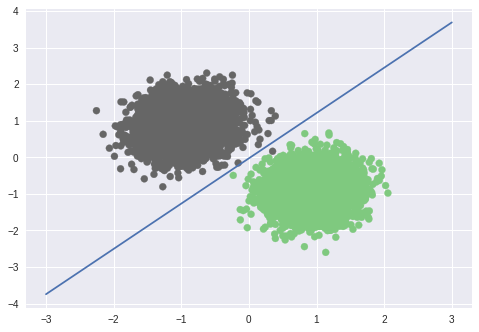

In [111]:
# Visualize Decision Surface

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train.reshape((-1,)), cmap=plt.cm.Accent)
x1 = np.arange(-3, 4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1, x2)
plt.show()

In [112]:
def predict(X, theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    return output

In [113]:
X_New_Test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
print(X_New_Test.shape)

(2000, 3)


In [114]:
X_train_pred = predict(X_new_train, theta)
X_test_pred = predict(X_New_Test, theta)

In [115]:
def accuracy(actual, pred):
    actual = actual.astype('int')
    
    return np.sum(actual==pred)/actual.shape[0] *100

In [116]:
print("Training Accuracy ", accuracy(Y_train, X_train_pred))
print("Testing Accuracy", accuracy(Y_test.reshape((-1,1)), X_test_pred))

Training Accuracy  99.9875
Testing Accuracy 99.8


In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
model = LogisticRegression()

In [119]:
model.fit(X_train, Y_train)

/home/luna/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [120]:
theta_0 = model.intercept_
theta_s = model.coef_

print(theta_0, theta_s)

[0.26146626] [[-5.85232408  4.33342202]]


In [121]:
model.score(X_train, Y_train)

0.999875

In [122]:
model.score(X_test, Y_test)

0.998

In [123]:
model.predict_proba(X_test)

array([[8.24154849e-06, 9.99991758e-01],
       [9.97922214e-01, 2.07778617e-03],
       [9.99959220e-01, 4.07797834e-05],
       ...,
       [2.29070233e-05, 9.99977093e-01],
       [9.99982971e-01, 1.70292454e-05],
       [9.99789101e-01, 2.10898544e-04]])